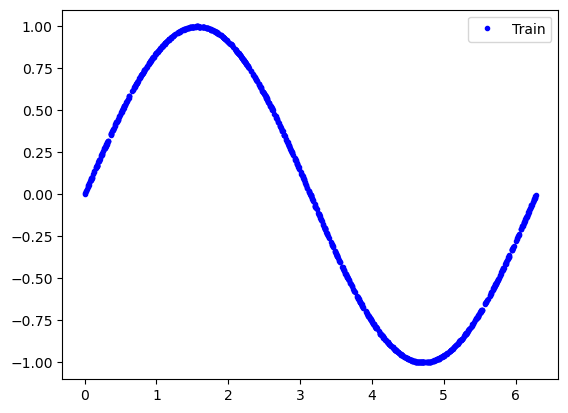

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

SAMPLES = 1000
SEED = 1337

np.random.seed(SEED)
tf.random.set_seed(SEED)
xValues = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
np.random.shuffle(xValues)
yValues = np.sin(xValues)

plt.plot(xValues, yValues, 'b.', label="Train")
plt.legend()
plt.show()

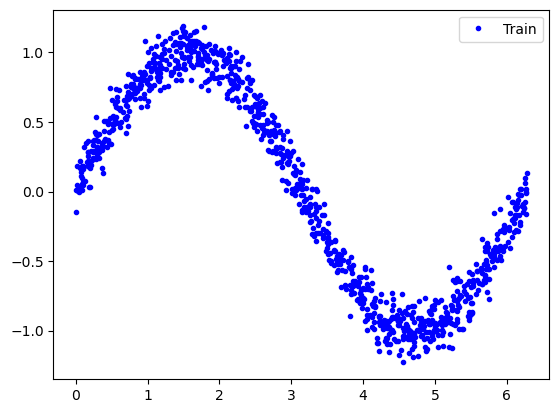

In [7]:
yValues += 0.1 * np.random.randn(*yValues.shape)

plt.plot(xValues, yValues, 'b.', label="Train")
plt.legend()
plt.show()

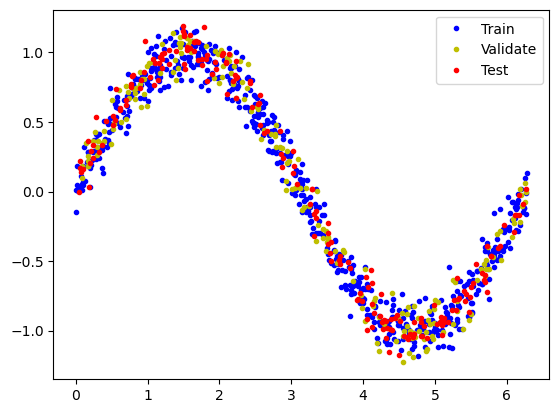

In [8]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

xTrain, xValidate, xTest = np.split(xValues, [TRAIN_SPLIT, TEST_SPLIT])
yTrain, yValidate, yTest = np.split(yValues, [TRAIN_SPLIT, TEST_SPLIT])

plt.plot(xTrain, yTrain, 'b.', label="Train")
plt.plot(xValidate, yValidate, 'y.', label="Validate")
plt.plot(xTest, yTest, 'r.', label="Test")
plt.legend()
plt.show()


In [10]:
from keras import layers

model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_1.summary()

history_1 = model_1.fit(xTrain, yTrain, epochs=500, batch_size=16, validation_data=(xValidate, yValidate))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
38/38 [==============================] - 1s 7ms/step - loss: 3.5371 - mae: 1.4900 - val_loss: 2.7343 - val_mae: 1.3302
Epoch 2/500
38/38 [==============================] - 0s 3ms/step - loss: 2.2464 - mae: 1.2310 - val_loss: 1.7829 - val_mae: 1.1275
Epoch 3/500
38/38 [==============================] - 0s 3ms/step - loss: 1.4616 - mae: 1.0378 - val_loss: 1.1984 - val_mae: 0.9673
Epoch 4/500
38/38 [==============================] - 0s 3ms/s

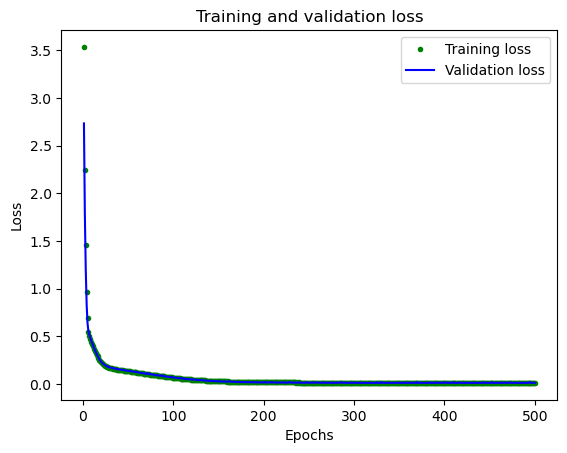

In [11]:

loss = history_1.history['loss']
valLoss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, valLoss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 [==============================] - 0s 2ms/step


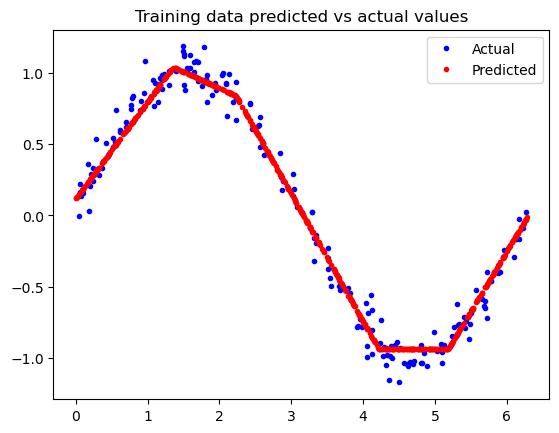

In [12]:
predictions = model_1.predict(xTrain)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(xTest, yTest, 'b.', label='Actual')
plt.plot(xTrain, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [13]:
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()
history_2 = model_2.fit(xTrain, yTrain, epochs=250, batch_size=16, validation_data=(xValidate, yValidate))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                32        
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
38/38 [==============================] - 1s 11ms/step - loss: 0.3766 - mae: 0.5315 - val_loss: 0.3526 - val_mae: 0.5120
Epoch 2/250
38/38 [==============================] - 0s 4ms/step - loss: 0.3064 - mae: 0.4816 - val_loss: 0.2977 - val_mae: 0.4635
Epoch 3/250
38/38 [==============================] - 0s 4

7/7 [==============================] - 0s 2ms/step


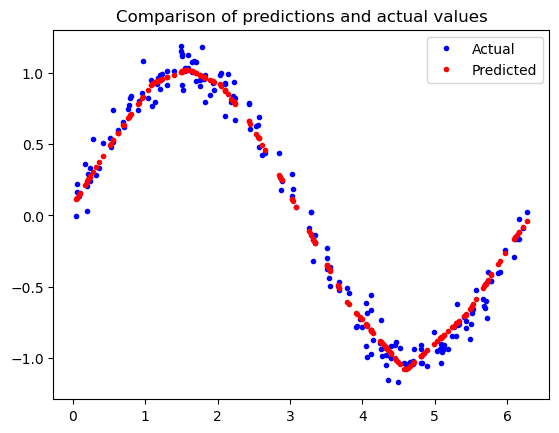

In [14]:
loss = model_2.evaluate(xTest, yTest)
predictions = model_2.predict(xTest)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(xTest, yTest, 'b.', label='Actual')
plt.plot(xTest, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
open("model.tflite", "wb").write(tflite_model)

converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_generator():
 for value in xTest:
    yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
converter.representative_dataset = representative_dataset_generator
tflite_model = converter.convert()

open("model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\lovro\AppData\Local\Temp\tmp_0ynknr0\assets


INFO:tensorflow:Assets written to: C:\Users\lovro\AppData\Local\Temp\tmp_0ynknr0\assets


INFO:tensorflow:Assets written to: C:\Users\lovro\AppData\Local\Temp\tmpu2554b2m\assets


INFO:tensorflow:Assets written to: C:\Users\lovro\AppData\Local\Temp\tmpu2554b2m\assets
C:\Users\lovro\AppData\Roaming\Python\Python310\site-packages\tensorflow\lite\python\convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


2680